#**Início**

In [ ]:
import pandas as pd                 # Manipulação dos dados
import warnings as wa               # Ignorar avisos gerados pelo uso do "pandas" (https://cursos.alura.com.br/forum/topico-como-fazer-para-evitar-o-warning-205682)
import seaborn as sns               # Construção dos gráficos
import matplotlib.pyplot as plt     # Construção dos gráficos

### Ignorando warnings (avisos) do tipo FutureWarning (Aviso futuro) ###
wa.simplefilter(action = 'ignore', category = FutureWarning)
pd.options.mode.chained_assignment = None

In [ ]:
path_jogos   = "https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv?raw=true"

### Leitura dos arquivos ###
df_jogos   = pd.read_csv(path_jogos  , delimiter = ";")  # Dados separados por ";"

#display(df_jogos)

#**Tratamento de dados**

In [ ]:
# Exclui colunas fora do interesse #
df_jogos.drop(columns = ['Rodada', 'Data', 'Horário', 'Dia', 'Vencedor', 'Arena', 'Estado Mandante', 'Estado Visitante', 'Estado Vencedor'], inplace = True)

# Mesmo formato de escrita para todos os nomes #
df_jogos['Mandante'] = df_jogos['Mandante'].str.title()
df_jogos['Visitante'] = df_jogos['Visitante'].str.title()

#df_jogos

#**Agrupamento de Dados**

In [ ]:
df_mandante = df_jogos[['Mandante', 'Mandante Placar']]
#display(df_mandante)

df_visitante = df_jogos[['Visitante', 'Visitante Placar']]
#display(df_visitante)

*Total de Gols*

In [ ]:
# Somando todos os gols #
df_gols_total = df_jogos[['Mandante', 'Visitante','Mandante Placar', 'Visitante Placar']].groupby('Mandante').agg(lambda x: sum(x)).reset_index()
df_gols_total['Total de Gols'] = df_gols_total['Mandante Placar'] + df_gols_total['Visitante Placar']
df_gols_total.head()

,Mandante,Mandante Placar,Visitante Placar,Total de Gols
0,América-Mg,68,64,132
1,América-Rn,12,35,47
2,Athlético-Pr,557,300,857
3,Atlético-Go,119,112,231
4,Atlético-Mg,582,361,943


In [ ]:
# Exclui colunas fora do interesse #
df_gols_total.drop(columns = ['Mandante Placar', 'Visitante Placar'], inplace = True)
df_gols_total.head()

,Mandante,Total de Gols
0,América-Mg,132
1,América-Rn,47
2,Athlético-Pr,857
3,Atlético-Go,231
4,Atlético-Mg,943


In [ ]:
# Renomeando a coluna #
df_gols_total.rename(columns = {'Mandante': 'Time'}, inplace = True)
df_gols_total.head()

,Time,Total de Gols
0,América-Mg,132
1,América-Rn,47
2,Athlético-Pr,857
3,Atlético-Go,231
4,Atlético-Mg,943


In [ ]:
# Colocando a nova tabelas em ordem decrescente de total de gols #
df_gols_total.sort_values(by = 'Total de Gols', ascending = False, inplace = True)
df_gols_total.head()

,Time,Total de Gols
38,Santos,981
16,Cruzeiro,946
4,Atlético-Mg,943
19,Flamengo,919
41,São Paulo,909


*Mandantes e Visitantes em separado*

In [ ]:
# Agrupando os Mandantes #
df_mandante = df_mandante[['Mandante', 'Mandante Placar']].groupby('Mandante').agg(lambda x: sum(x)).reset_index()
df_mandante.rename(columns = {"Mandante Placar": "Gols_man"}, inplace=True)

In [ ]:
# Agrupando os Visitantes #
df_visitante = df_visitante[['Visitante', 'Visitante Placar']].groupby('Visitante').agg(lambda x: sum(x)).reset_index()
df_visitante.rename(columns = {"Visitante Placar": "Gols_vis"}, inplace=True)

In [ ]:
# Colocando as novas tabelas em ordem decrescente de quantidade de gols #
df_mandante.sort_values(by = 'Gols_man', ascending = False, inplace = True)
df_visitante.sort_values(by = 'Gols_vis', ascending = False, inplace = True)

#display(df_mandante.head())
#display(df_visitante.head())

#**Gráficos**

*Top 10 Geral*

In [ ]:
df_top10 = df_gols_total.head(10)
#display(df_top10)

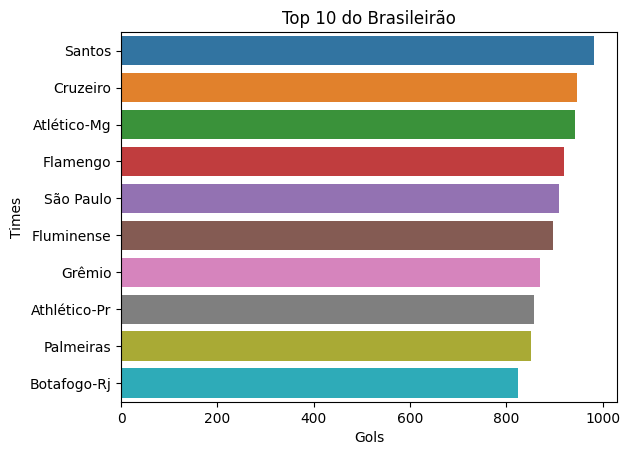

In [ ]:
# Gráfico em Barras #
sns.barplot(x = "Total de Gols", y = "Time", data = df_top10)
plt.xlabel('Gols')
plt.ylabel('Times')
plt.title('Top 10 do Brasileirão')
plt.show()

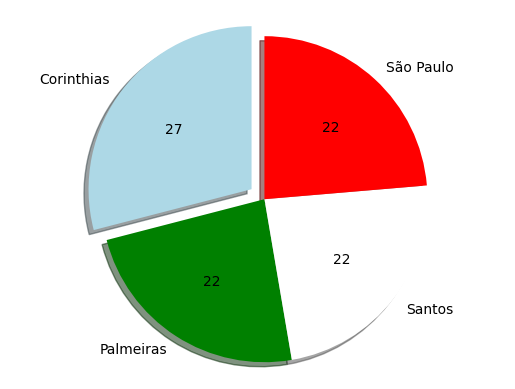

In [ ]:
# Gráfico em Pizza #
def plota_pizza_1():
 labels = ['Corinthias', 'Palmeiras', 'Santos', 'São Paulo']
 titulos = [27, 22, 22, 22]
 cores = ['lightblue', 'green', 'white', 'red']
 explode = (0.1, 0, 0, 0) # somente explode primeiro pedaço
 total = sum(titulos)
 plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
 plt.axis('equal')
plota_pizza_1()
plt.show()

*Top 10 de Mandantes e Visitantes*

In [ ]:
df_top10_man = df_mandante.head(10)
#display(df_top10_man)

df_top10_vis = df_visitante.head(10)
#display(df_top10_vis)

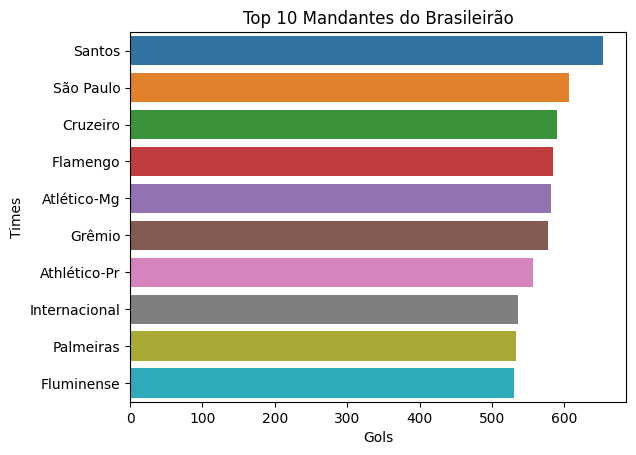

In [ ]:
sns.barplot(x = "Gols_man", y = "Mandante", data = df_top10_man)
plt.xlabel('Gols')
plt.ylabel('Times')
plt.title('Top 10 Mandantes do Brasileirão')
plt.show()

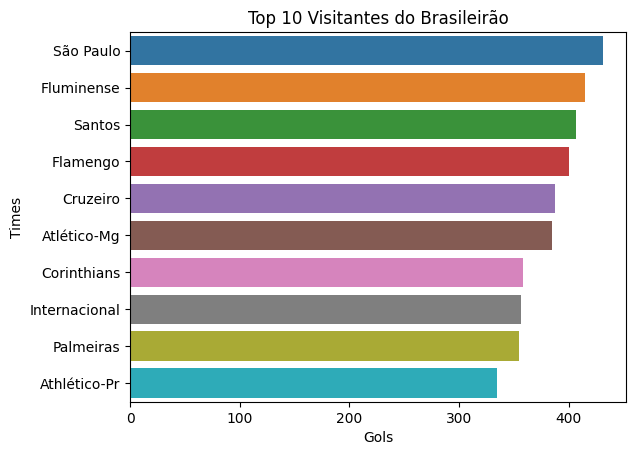

In [ ]:
sns.barplot(x = "Gols_vis", y = "Visitante", data = df_top10_vis)
plt.xlabel('Gols')
plt.ylabel('Times')
plt.title('Top 10 Visitantes do Brasileirão')
plt.show()